In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
import collections
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, make_scorer, f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Load of data
data = pd.read_csv('data.csv', header=0)
data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df = data.copy()

#**1. Data Exploration**

In [ ]:
df.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [ ]:
df.shape

(150000, 11)

In [ ]:
# Descriptive statistics
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [ ]:
# Percent of missing values
df.isnull().sum()/df.shape[0]

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.198207
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.026160
dtype: float64

#**2. Data Cleaning**

In [ ]:
(df[df['DebtRatio']>1]['DebtRatio'].count())/df.shape[0]

0.23424666666666666

In [ ]:
# Relation between hight debt ratio and observation with missing income
Debt_Income = pd.DataFrame()
Debt_Income['DebtRatio>1'] = np.where(df['DebtRatio']>1, 1, 0)
Debt_Income['Income_missing'] = np.where(np.isnan(df['MonthlyIncome']), 1, 0)
Debt_Income

,DebtRatio>1,Income_missing
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
149995,0,0
149996,0,0
149997,1,1
149998,0,0


In [ ]:
(Debt_Income.corr()).iloc[0,1]

0.826810286793814

In [ ]:
Debt_Income['Delete'] = np.where((Debt_Income['DebtRatio>1']==1) & (Debt_Income['Income_missing']==1), 1, 0)
Debt_Income['Delete'].sum()

27904

In [ ]:
df = df[~((df['DebtRatio']>1) & (np.isnan(df['MonthlyIncome'])))]

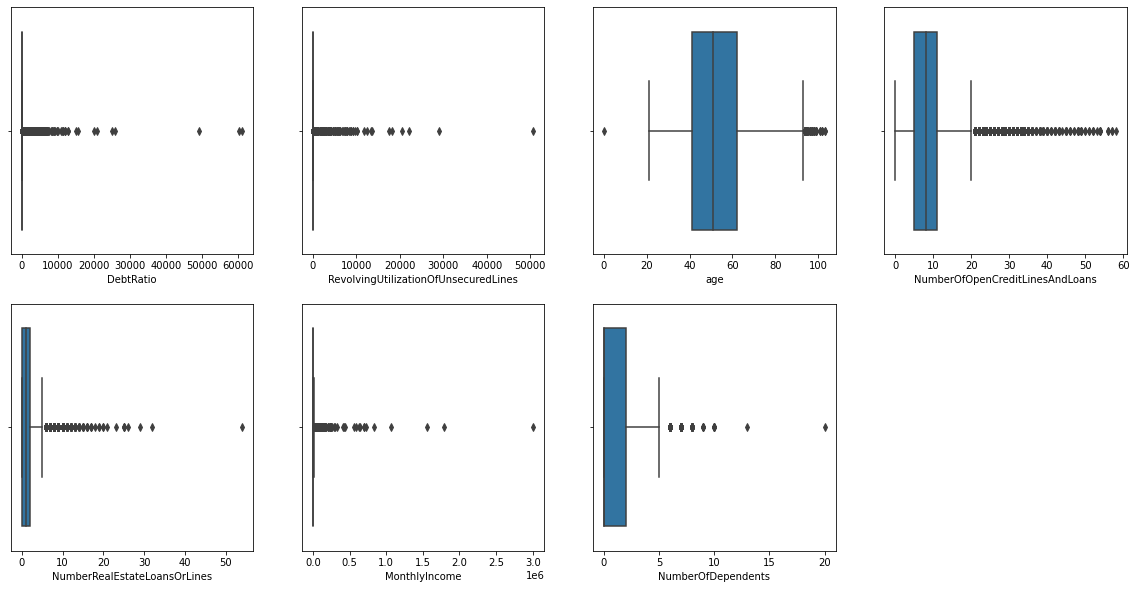

In [ ]:
# Boxplot of the variables
fig, axes = plt.subplots(2,4, figsize=(20,10))
sns.boxplot(data=df, orient='h', ax=axes[0,0], x='DebtRatio')
sns.boxplot(data=df, orient='h', ax=axes[0,1], x='RevolvingUtilizationOfUnsecuredLines')
sns.boxplot(data=df, orient='h', ax=axes[0,2], x='age')
sns.boxplot(data=df, orient='h', ax=axes[0,3], x='NumberOfOpenCreditLinesAndLoans')
sns.boxplot(data=df, orient='h', ax=axes[1,0], x='NumberRealEstateLoansOrLines')
sns.boxplot(data=df, orient='h', ax=axes[1,1], x='MonthlyIncome')
sns.boxplot(data=df, orient='h', ax=axes[1,2], x='NumberOfDependents')
fig.delaxes(axes[1,3])


In [ ]:
def drop_outliers(variable):

  '''
  Function to drop outliers based on the interquantile range

  Input: variable of the dataframe
  Output: variable without outliers
  
  '''
  df2 = df.copy()
  df2 = data[[variable]]
  Q1 = df2.quantile(0.25)
  Q3 = df2.quantile(0.75)
  IQR = Q3 - Q1
  return df[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,122096.000000,122096.000000,122096.000000,122096.000000,122096.000000,1.202690e+05,122096.000000,122096.000000,122096.000000,122096.000000,121620.000000
mean,0.069355,5.818474,51.405582,0.451194,26.202442,6.670221e+03,8.663797,0.284538,1.038740,0.259943,0.843792
std,0.254058,255.111238,14.583215,4.394790,421.271106,1.438467e+04,5.199516,4.371083,1.147805,4.357744,1.145915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033703,41.000000,0.000000,0.136699,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.176019,51.000000,0.000000,0.292491,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.585132,62.000000,0.000000,0.480466,8.249000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,50708.000000,103.000000,98.000000,61106.500000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [ ]:
for i in ['DebtRatio', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines', 'MonthlyIncome', 'NumberOfDependents']:
  df = drop_outliers(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [ ]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,99289.000000,99289.000000,99289.000000,99289.000000,99289.000000,97494.000000,99289.000000,99289.000000,99289.000000,99289.000000,98816.000000
mean,0.066191,0.327595,51.826929,0.474866,0.330376,5729.836769,8.067701,0.317900,0.924936,0.293869,0.547351
std,0.248616,0.353522,15.176157,4.787985,0.288035,3144.513505,4.390008,4.768205,0.951389,4.757598,0.756442
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030462,40.000000,0.000000,0.121649,3333.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.165803,52.000000,0.000000,0.279049,5099.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.577286,63.000000,0.000000,0.457886,7600.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,1.352159,96.000000,98.000000,1.906765,15509.000000,20.000000,98.000000,5.000000,98.000000,2.000000


In [ ]:
# Percent of missing values
df.isnull().sum()/df.shape[0]

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.018079
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.004764
dtype: float64

In [ ]:
# Impute the missing values with zeros
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(0)
df['NumberOfDependents'] = df['NumberOfDependents'].fillna(0)

In [ ]:
# Percent of missing values
df.isnull().sum()/df.shape[0]

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

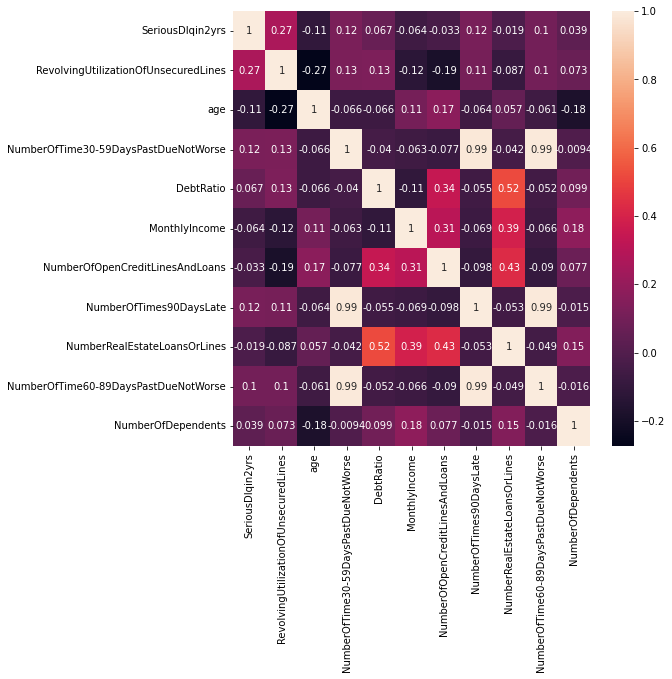

In [ ]:
# Correlation matrix
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


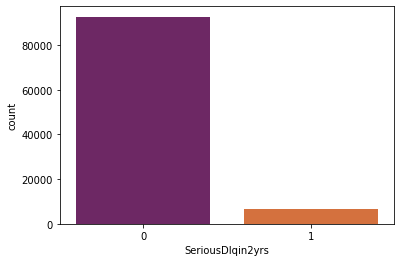

In [ ]:
# Unbalanced data of target variable
sns.countplot(df['SeriousDlqin2yrs'], palette='inferno')

In [ ]:
df['SeriousDlqin2yrs'].value_counts()[0]/df.shape[0]

0.9338093847253975

In [ ]:
df['SeriousDlqin2yrs'].value_counts()[1]/df.shape[0]

0.06619061527460242

In [ ]:
X = df.drop('SeriousDlqin2yrs', axis=1).copy()
y = df['SeriousDlqin2yrs'].copy()


In [ ]:
# Synthetic Minority Oversampling Technique
sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')


Shape of X before SMOTE: (99289, 10)
Shape of X after SMOTE: (185434, 10)


In [ ]:
collections.Counter(y_sm)

Counter({0: 92717, 1: 92717})

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, random_state=42, stratify=y_sm)

#**3. Modelling and evaluation**

###**Model: AdaBoost**


In [ ]:
model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [ ]:
preds = model.predict(X_test)

In [ ]:
# AdaBoost Results
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84     23180
           1       0.86      0.81      0.83     23179

    accuracy                           0.84     46359
   macro avg       0.84      0.84      0.84     46359
weighted avg       0.84      0.84      0.84     46359



###**Model: XGBoost**

In [ ]:
model = xgb.XGBClassifier(objective='binary:logistic', seed=42)
model.fit(X_train, y_train)

XGBClassifier(seed=42)

In [ ]:
preds = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


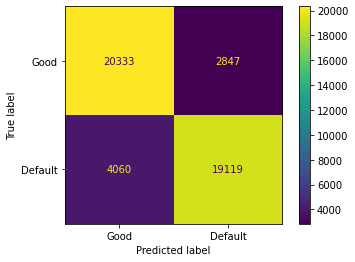

In [ ]:
plot_confusion_matrix(model, X_test, y_test, values_format='d', display_labels=['Good', 'Default'])

In [ ]:
# XGBoost results
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85     23180
           1       0.87      0.82      0.85     23179

    accuracy                           0.85     46359
   macro avg       0.85      0.85      0.85     46359
weighted avg       0.85      0.85      0.85     46359



In [ ]:
parameters = {'learning_rate': [0.1, 0.01],
              'max_depth': [3, 5, 7],
              'n_estimators': [100, 200, 300]}

In [ ]:
cv = GridSearchCV(estimator=model, param_grid=parameters, scoring = make_scorer(f1_score))

In [ ]:
cv.fit(X_train, y_train)


GridSearchCV(estimator=XGBClassifier(seed=42),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring=make_scorer(f1_score))

In [ ]:
preds = cv.predict(X_test)

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     23180
           1       0.89      0.85      0.87     23179

    accuracy                           0.87     46359
   macro avg       0.87      0.87      0.87     46359
weighted avg       0.87      0.87      0.87     46359



In [ ]:
#Best XGBoost model
cv.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}